# Análisis de la ocupación porcentual hotelera

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
zona = pd.read_csv('.\datos\porcentaje_ocupacion_hotelera_mensual_por_zona.csv')
zona.head()

,ocu_periodo,ocu_valor,ocu_zona
0,202209,79.342694,LAURELES
1,202209,79.465601,POBLADO
2,202209,49.941003,CENTRO
3,202109,66.100000,POBLADO
4,202109,64.900000,LAURELES


In [129]:
zona['ocu_zona'].unique()

array(['LAURELES', 'POBLADO', 'CENTRO'], dtype=object)

In [130]:
zona['ocu_periodo'].unique()

array([202209, 202109, 202009, 201909, 201809, 201709, 201609, 201509,
       201409, 201309, 201209, 201109, 201009, 200909, 200809, 200709,
       202208, 202108, 202008, 201908, 201808, 201708, 201608, 201508,
       201408, 201308, 201208, 201108, 201008, 200908, 200808, 200708,
       202207, 202107, 202007, 201907, 201807, 201707, 201607, 201507,
       201407, 201307, 201207, 201107, 201007, 200907, 200807, 200707,
       202206, 202106, 202006, 201906, 201806, 201706, 201606, 201506,
       201406, 201306, 201206, 201106, 201006, 200906, 200806, 200706,
       202205, 202105, 202005, 201905, 201805, 201705, 201605, 201505,
       201405, 201305, 201205, 201105, 201005, 200905, 200805, 200705,
       202204, 202104, 202004, 201904, 201804, 201704, 201604, 201504,
       201404, 201304, 201204, 201104, 201004, 200904, 200804, 200704,
       202303, 202203, 202103, 202003, 201903, 201803, 201703, 201603,
       201503, 201403, 201303, 201203, 201103, 201003, 200903, 200803,
      

In [131]:
# Convert 'ocu_periodo' to a datetime format with year and month
zona['ocu_periodo'] = pd.to_datetime(zona['ocu_periodo'], format='%Y%m')

In [132]:
zona['ocu_periodo'].unique()    

<DatetimeArray>
['2022-09-01 00:00:00', '2021-09-01 00:00:00', '2020-09-01 00:00:00',
 '2019-09-01 00:00:00', '2018-09-01 00:00:00', '2017-09-01 00:00:00',
 '2016-09-01 00:00:00', '2015-09-01 00:00:00', '2014-09-01 00:00:00',
 '2013-09-01 00:00:00',
 ...
 '2016-01-01 00:00:00', '2015-01-01 00:00:00', '2014-01-01 00:00:00',
 '2013-01-01 00:00:00', '2012-01-01 00:00:00', '2011-01-01 00:00:00',
 '2010-01-01 00:00:00', '2009-01-01 00:00:00', '2008-01-01 00:00:00',
 '2007-01-01 00:00:00']
Length: 195, dtype: datetime64[ns]

<Figure size 1000x600 with 0 Axes>

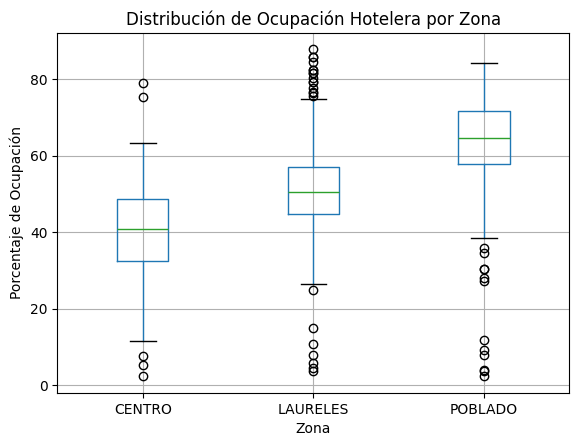

In [133]:
plt.figure(figsize=(10, 6))
zona.boxplot(column='ocu_valor', by='ocu_zona')
plt.title('Distribución de Ocupación Hotelera por Zona')
plt.suptitle('')  # Remove the default super title
plt.xlabel('Zona')
plt.ylabel('Porcentaje de Ocupación')
plt.show()

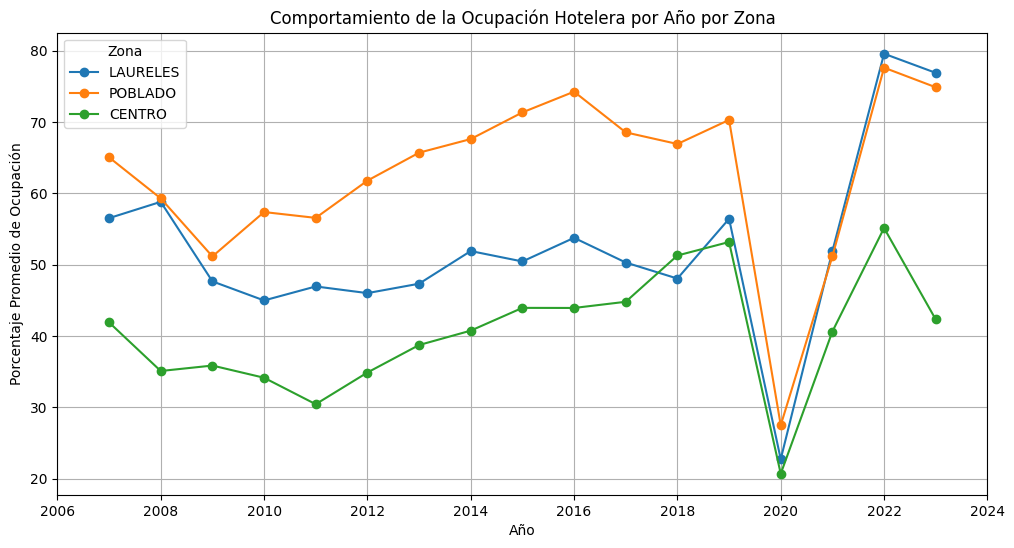

In [134]:
# Add a new column for the year to analyze yearly trends
zona['Year'] = zona['ocu_periodo'].dt.year

# Plot the average occupancy by year for each location
plt.figure(figsize=(12, 6))
for zona_name in zona['ocu_zona'].unique():
    # Filter data by zone and calculate yearly mean
    yearly_data = zona[zona['ocu_zona'] == zona_name].groupby('Year')['ocu_valor'].mean()
    plt.plot(yearly_data.index, yearly_data.values, marker='o', label=zona_name)

plt.title('Comportamiento de la Ocupación Hotelera por Año por Zona')
plt.xlabel('Año')
plt.ylabel('Porcentaje Promedio de Ocupación')
plt.legend(title='Zona')
plt.grid(True)
plt.xlim(zona['Year'].min()-1, zona['Year'].max()+1)  # Ensure the x-axis includes all years
plt.show()


In [135]:
mitad = pd.read_csv('.\datos\porcentaje_ocupacion_hotelera_vacaciones_mitad_de_ano.csv')
mitad.head()

,ocu_periodo,ocu_valor,ocu_zona
0,2021,40.03,TOTAL_ZONAS
1,2021,26.95,CENTRO
2,2021,34.40,LAURELES
3,2021,40.72,POBLADO
4,2019,46.71,CENTRO


In [136]:
# Filtrar el DataFrame para excluir las filas donde 'ocu_zona' sea 'TOTAL_ZONAS'
mitad = mitad[mitad['ocu_zona'] != 'TOTAL_ZONAS']
mitad.head()

,ocu_periodo,ocu_valor,ocu_zona
1,2021,26.95,CENTRO
2,2021,34.40,LAURELES
3,2021,40.72,POBLADO
4,2019,46.71,CENTRO
5,2019,53.56,LAURELES


In [137]:
mitad['ocu_periodo'].unique()

array([2021, 2019, 2018, 2017, 2016, 2015])

In [138]:
mitad['ocu_periodo'] = pd.to_datetime(mitad['ocu_periodo'], format='%Y')

In [139]:
mitad['ocu_zona'].unique()

array(['CENTRO', 'LAURELES', 'POBLADO'], dtype=object)

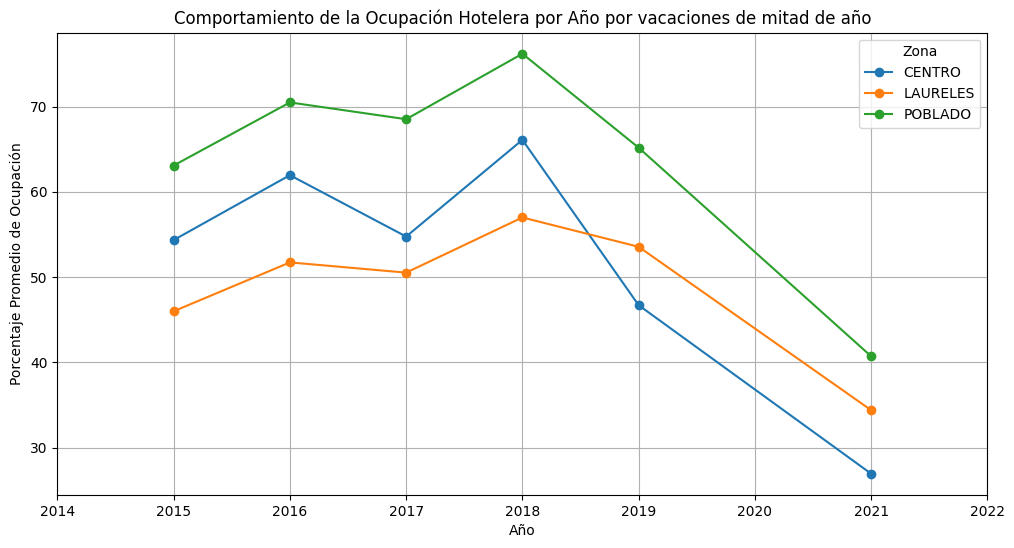

In [140]:
# Add a new column for the year to analyze yearly trends
mitad['Year'] = mitad['ocu_periodo'].dt.year

# Plot the average occupancy by year for each location
plt.figure(figsize=(12, 6))
for zona_name in mitad['ocu_zona'].unique():
    # Filter data by zone and calculate yearly mean
    yearly_data = mitad[mitad['ocu_zona'] == zona_name].groupby('Year')['ocu_valor'].mean()
    plt.plot(yearly_data.index, yearly_data.values, marker='o', label=zona_name)

plt.title('Comportamiento de la Ocupación Hotelera por Año por vacaciones de mitad de año')
plt.xlabel('Año')
plt.ylabel('Porcentaje Promedio de Ocupación')
plt.legend(title='Zona')
plt.grid(True)
plt.xlim(mitad['Year'].min()-1, mitad['Year'].max()+1)  # Ensure the x-axis includes all years
plt.show()

In [141]:
moda = pd.read_csv('.\datos\porcentaje_ocupacion_hotelera_colombiamoda.csv')
moda.head()

,ocu_periodo,ocu_valor,ocu_zona
0,202104,65.71,LAURELES
1,202104,36.28,CENTRO
2,202104,63.54,TOTAL_ZONAS
3,202104,64.37,POBLADO
4,201904,80.42,LAURELES


In [142]:
moda['ocu_periodo'].unique()

array([202104, 201904, 201804, 201704, 201604, 201504, 202103, 201903,
       201803, 201703, 201603, 201503, 202102, 201902, 201802, 201702,
       201602, 201502, 202101, 201901, 201801, 201701, 201601, 201501])

In [143]:
moda['ocu_periodo'] = pd.to_datetime(moda['ocu_periodo'], format='%Y%m')

In [144]:
# Filtrar el DataFrame para excluir las filas donde 'ocu_zona' sea 'TOTAL_ZONAS'
moda = moda[moda['ocu_zona'] != 'TOTAL_ZONAS']
moda.head()

,ocu_periodo,ocu_valor,ocu_zona
0,2021-04-01,65.71,LAURELES
1,2021-04-01,36.28,CENTRO
3,2021-04-01,64.37,POBLADO
4,2019-04-01,80.42,LAURELES
6,2019-04-01,88.30,POBLADO


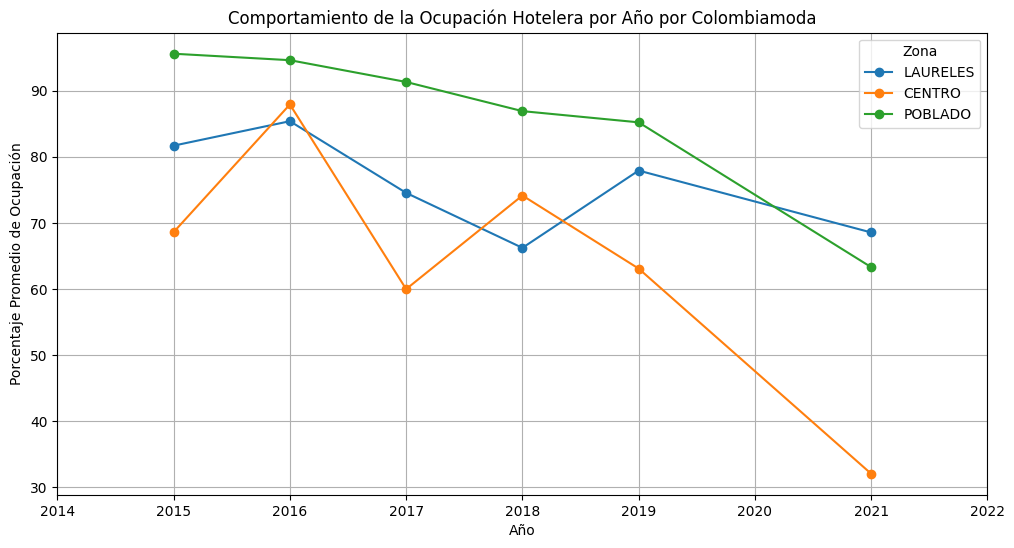

In [145]:
# Add a new column for the year to analyze yearly trends
moda['Year'] = moda['ocu_periodo'].dt.year

# Plot the average occupancy by year for each location
plt.figure(figsize=(12, 6))
for zona_name in moda['ocu_zona'].unique():
    # Filter data by zone and calculate yearly mean
    yearly_data = moda[moda['ocu_zona'] == zona_name].groupby('Year')['ocu_valor'].mean()
    plt.plot(yearly_data.index, yearly_data.values, marker='o', label=zona_name)

plt.title('Comportamiento de la Ocupación Hotelera por Año por Colombiamoda')
plt.xlabel('Año')
plt.ylabel('Porcentaje Promedio de Ocupación')
plt.legend(title='Zona')
plt.grid(True)
plt.xlim(moda['Year'].min()-1, moda['Year'].max()+1)  # Ensure the x-axis includes all years
plt.show()